In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from datasets import SingleImageDataset

In [4]:
img_path = 'data/jasper/jasper_ridge_224.mat'
gt_path = 'data/jasper/jasper_ridge_gt.mat'
start_band = 380; end_band = 2500
rgb_width = 64; rgb_height = 64
hsi_width = 32; hsi_height = 32
channels=[20, 60, 80, 100, 120, 140]
dataset = SingleImageDataset(channels,
                 img_path, gt_path,
                 start_band, end_band, 
                 rgb_width, rgb_height,
                 hsi_width, hsi_height)

In [5]:
import torch
from torch.utils.data import DataLoader

trainloader = DataLoader(dataset, batch_size=16, shuffle=True)
hsi_batch, rgb_batch, gt_batch = next(iter(trainloader))

In [6]:
print(hsi_batch.shape, rgb_batch.shape, gt_batch.shape)

torch.Size([16, 6, 32, 32]) torch.Size([16, 3, 64, 64]) torch.Size([16, 4, 64, 64])


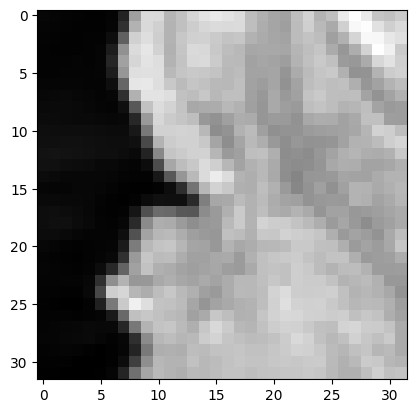

In [7]:
import numpy as np
plt.imshow(hsi_batch[2][1, :, :], cmap="gray")
plt.show()

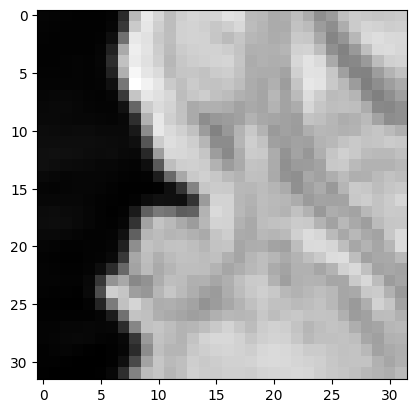

In [8]:
plt.imshow(hsi_batch[2][3, :, :], cmap="gray")
plt.show()

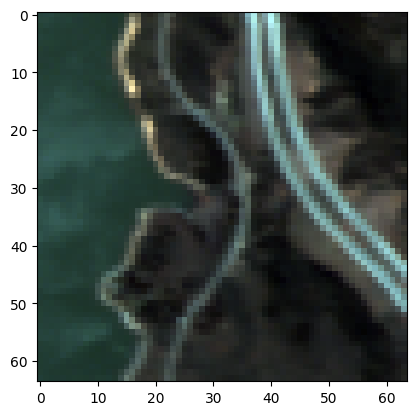

In [9]:
plt.imshow(torch.moveaxis(rgb_batch[2], 0, 2))
plt.show()

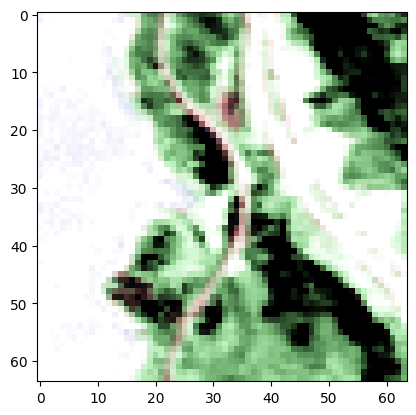

In [10]:
plt.imshow(torch.moveaxis(gt_batch[2], 0, 2))
plt.show()

In [30]:
import torch.optim as optim
from neural_nets.models import SiameseUNet
from train_utils import main_training_loop
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SiameseUNet(6, 3, 256, 4).to(torch.double).to(DEVICE)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
main_training_loop(trainloader, net, optimizer, 
                 num_epochs=40, device=DEVICE, log_interval=40)


Epoch: 1
[1,    40] loss: 1.214
[1,    80] loss: 1.114

Epoch: 2
[2,    40] loss: 1.097
[2,    80] loss: 1.088

Epoch: 3
[3,    40] loss: 1.084
[3,    80] loss: 1.085

Epoch: 4
[4,    40] loss: 1.084
[4,    80] loss: 1.081

Epoch: 5
[5,    40] loss: 1.081
[5,    80] loss: 1.079

Epoch: 6
[6,    40] loss: 1.080
[6,    80] loss: 1.078

Epoch: 7
[7,    40] loss: 1.078
[7,    80] loss: 1.077

Epoch: 8
[8,    40] loss: 1.075
[8,    80] loss: 1.077

Epoch: 9
[9,    40] loss: 1.076
[9,    80] loss: 1.075

Epoch: 10
[10,    40] loss: 1.076
[10,    80] loss: 1.074

Epoch: 11
[11,    40] loss: 1.075
[11,    80] loss: 1.074

Epoch: 12
[12,    40] loss: 1.074
[12,    80] loss: 1.073

Epoch: 13
[13,    40] loss: 1.074
[13,    80] loss: 1.073

Epoch: 14
[14,    40] loss: 1.075
[14,    80] loss: 1.073

Epoch: 15
[15,    40] loss: 1.071
[15,    80] loss: 1.076

Epoch: 16
[16,    40] loss: 1.071
[16,    80] loss: 1.075

Epoch: 17
[17,    40] loss: 1.074
[17,    80] loss: 1.070

Epoch: 18
[18,    40] l

In [31]:
from train_utils import test
model_path = 'models/trained_model.pth'
trained_net = SiameseUNet(6, 3, 256, 4).to(torch.double).to(DEVICE)
trained_net.load_state_dict(torch.load(model_path))
testloader = DataLoader(dataset, batch_size=16, shuffle=True)
mIOU = test(testloader, net, num_classes=4)

In [33]:
print(mIOU)

[0.2045297  0.21587601 0.5134569  0.23226929]
